## **Cart-Pole Balancing using NEAT**
### **This project aims to use the NEAT (NeuroEvolution of Augmenting Topologies) algorithm to solve the Cart-Pole balancing problem.**

In [1]:
import gym

# Create the Cart-Pole environment
env = gym.make('CartPole-v1')

# Test the environment
observation = env.reset()
for _ in range(1000):
    env.render()
    
    action = env.action_space.sample()  # Random action
    
    # Unpack five values instead of four
    observation, reward, done, truncated, info = env.step(action)
    
    if done or truncated:
        observation = env.reset()
        
env.close()

c:\Users\davic\anaconda3\Lib\site-packages\gym\envs\classic_control\cartpole.py:211: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym("CartPole-v1", render_mode="rgb_array")
  gym.logger.warn(
c:\Users\davic\anaconda3\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


In [16]:
import neat
import gym
import numpy as np

def eval_genomes(genomes, config):
    env = gym.make('CartPole-v1')
    
    for genome_id, genome in genomes:
        observation = env.reset()

        # Create a neural network from the genome
        net = neat.nn.FeedForwardNetwork.create(genome, config)

        fitness = 0
        done = False
        while not done:
            # Debugging: print out the observation structure
            print(f"Raw observation: {observation}")

            # Extract the observation data correctly
            if isinstance(observation, tuple) and len(observation) == 2:
                # Handle case where observation is a tuple, pick first element
                observation = observation[0]

            observation = np.array(observation).flatten()

            if len(observation) != 4:
                raise RuntimeError(f"Expected 4 inputs, got {len(observation)}")

            # Get output from the neural network
            action = net.activate(observation)

            # Convert network output to action (either 0 or 1)
            action = 0 if action[0] < 0.5 else 1

            # Perform the action in the environment
            observation, reward, done, truncated, info = env.step(action)

            # Accumulate fitness
            fitness += reward

            if done or truncated:
                break

        genome.fitness = fitness  # Assign fitness to genome

# Load the NEAT configuration file
config_path = "config-feedforward.txt"
config = neat.config.Config(neat.DefaultGenome, neat.DefaultReproduction,
                            neat.DefaultSpeciesSet, neat.DefaultStagnation, config_path)

# Create the population
pop = neat.Population(config)

# Add reporters for progress tracking
pop.add_reporter(neat.StdOutReporter(True))
stats = neat.StatisticsReporter()
pop.add_reporter(stats)

# Run the NEAT algorithm for a set number of generations
winner = pop.run(eval_genomes, 100)

# Display the best genome
print('\nBest genome:\n{!s}'.format(winner))



 ****** Running generation 0 ****** 

Raw observation: (array([ 0.01198199, -0.03370193,  0.00115125, -0.00059749], dtype=float32), {})
Raw observation: [ 0.01130795 -0.22884037  0.0011393   0.29244846]
Raw observation: [ 0.00673114 -0.42397854  0.00698827  0.58549047]
Raw observation: [-0.00174843 -0.61919767  0.01869808  0.88036656]
Raw observation: [-0.01413239 -0.8145686   0.03630541  1.1788687 ]
Raw observation: [-0.03042376 -1.0101427   0.05988278  1.4827079 ]
Raw observation: [-0.05062661 -1.2059417   0.08953694  1.793475  ]
Raw observation: [-0.07474545 -1.4019456   0.12540644  2.112592  ]
Raw observation: [-0.10278436 -1.5980781   0.16765828  2.4412532 ]
Raw observation: (array([-0.01328638,  0.0311054 ,  0.04395479,  0.01264044], dtype=float32), {})
Raw observation: [-0.01266427 -0.16461846  0.0442076   0.31886122]
Raw observation: [-0.01595664 -0.36034122  0.05058482  0.62515134]
Raw observation: [-0.02316347 -0.5561315   0.06308785  0.93332666]
Raw observation: [-0.0342861

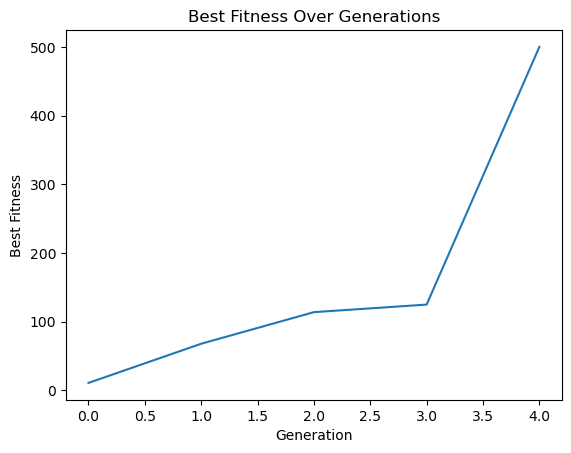

In [17]:
import matplotlib.pyplot as plt

# Plot fitness over generations
generation = range(len(stats.most_fit_genomes))
best_fitness = [g.fitness for g in stats.most_fit_genomes]

plt.plot(generation, best_fitness)
plt.title("Best Fitness Over Generations")
plt.xlabel("Generation")
plt.ylabel("Best Fitness")
plt.show()

In [18]:
import gym
import neat
import numpy as np
from gym.wrappers import RecordVideo
import os

# Ensure the video folder exists
if not os.path.exists('./video'):
    os.makedirs('./video')

# Function to trigger recording for all episodes
def always_record(episode_id):
    return True

# Create the environment with correct render mode and wrap it to record video for every episode
env = RecordVideo(gym.make('CartPole-v1', render_mode='rgb_array'), video_folder='./video', episode_trigger=always_record)

# Loop through multiple episodes
for episode in range(5):  # Change this number to the desired number of episodes
    observation = env.reset()
    done = False
    fitness = 0

    # Create a neural network from the winning genome
    winner_net = neat.nn.FeedForwardNetwork.create(winner, config)

    while not done:
        # Ensure the observation is a flattened 1D array with exactly 4 inputs
        if isinstance(observation, tuple) and len(observation) == 2:
            observation = observation[0]  # Handle if it's a tuple
        
        observation = np.array(observation).flatten()

        if len(observation) != 4:
            raise RuntimeError(f"Expected 4 inputs, got {len(observation)}")

        # Get action from the winning network
        action = winner_net.activate(observation)
        action = 0 if action[0] < 0.5 else 1

        # Step in the environment
        observation, reward, done, truncated, info = env.step(action)
        fitness += reward

    print(f"Episode {episode + 1} finished with fitness: {fitness}")

# Close the environment to finalize video saving
env.close()

print("All episodes have been saved successfully.")


Moviepy - Building video c:\Users\davic\Desktop\code\ML\Studies\NEAT GA\video\rl-video-episode-0.mp4.
Moviepy - Writing video c:\Users\davic\Desktop\code\ML\Studies\NEAT GA\video\rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\davic\Desktop\code\ML\Studies\NEAT GA\video\rl-video-episode-0.mp4
Episode 1 finished with fitness: 6328.0
Moviepy - Building video c:\Users\davic\Desktop\code\ML\Studies\NEAT GA\video\rl-video-episode-1.mp4.
Moviepy - Writing video c:\Users\davic\Desktop\code\ML\Studies\NEAT GA\video\rl-video-episode-1.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\davic\Desktop\code\ML\Studies\NEAT GA\video\rl-video-episode-1.mp4
Episode 2 finished with fitness: 6248.0
Moviepy - Building video c:\Users\davic\Desktop\code\ML\Studies\NEAT GA\video\rl-video-episode-2.mp4.
Moviepy - Writing video c:\Users\davic\Desktop\code\ML\Studies\NEAT GA\video\rl-video-episode-2.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\davic\Desktop\code\ML\Studies\NEAT GA\video\rl-video-episode-2.mp4
Episode 3 finished with fitness: 2512.0
Moviepy - Building video c:\Users\davic\Desktop\code\ML\Studies\NEAT GA\video\rl-video-episode-3.mp4.
Moviepy - Writing video c:\Users\davic\Desktop\code\ML\Studies\NEAT GA\video\rl-video-episode-3.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\davic\Desktop\code\ML\Studies\NEAT GA\video\rl-video-episode-3.mp4
Episode 4 finished with fitness: 5750.0
Moviepy - Building video c:\Users\davic\Desktop\code\ML\Studies\NEAT GA\video\rl-video-episode-4.mp4.
Moviepy - Writing video c:\Users\davic\Desktop\code\ML\Studies\NEAT GA\video\rl-video-episode-4.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\davic\Desktop\code\ML\Studies\NEAT GA\video\rl-video-episode-4.mp4
Episode 5 finished with fitness: 2774.0
All episodes have been saved successfully.
